# Ejercicio de PCA

Ejemplo para revisar el análisis de PCA para dos componentes con los datos MNIST de tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar la forma de los datos
print("Forma de x_train:", x_train.shape)  # (60000, 28, 28)
print("Forma de y_train:", y_train.shape)  # (60000,)
print("Forma de x_test:", x_test.shape)    # (10000, 28, 28)
print("Forma de y_test:", y_test.shape)    # (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Forma de y_test: (10000,)


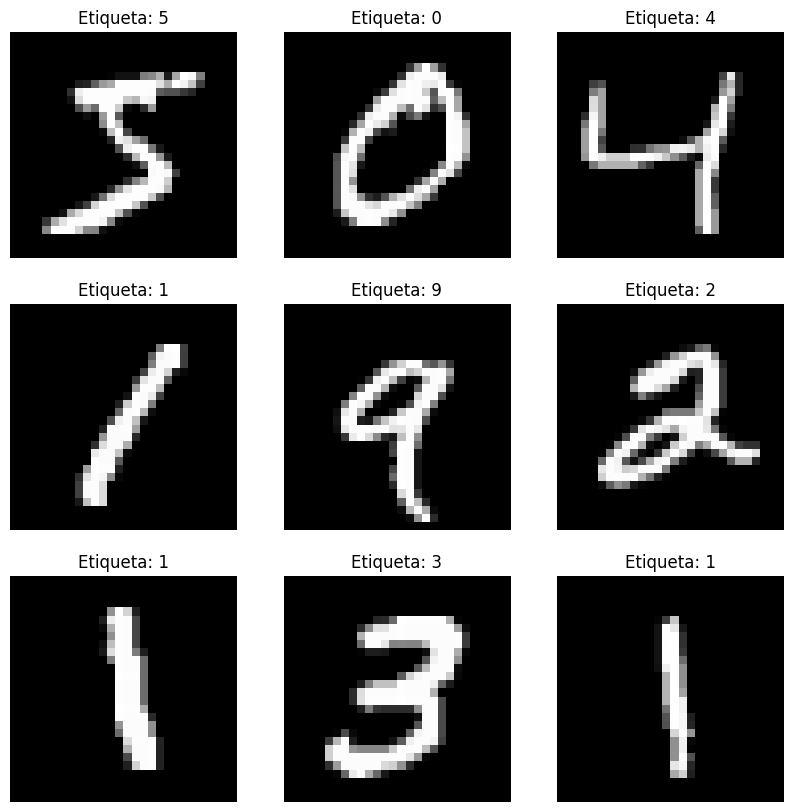

In [4]:
# Visualizar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplanar las imágenes (28x28 -> 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # (60000, 784)
x_test_flat = x_test.reshape(x_test.shape[0], -1)    # (10000, 784)

In [115]:
from sklearn.decomposition import PCA

# Aplicar PCA
n_components = 2  # Número de componentes principales
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.09704664 0.07095924]
Varianza total explicada: 0.16800588418808216


Si al aplicar **PCA (Análisis de Componentes Principales)** al conjunto de datos MNIST y graficar las dos primeras componentes principales observas que **muchos datos están concentrados en el centro**, puede deberse a diversas razones:

El gráfico de las dos primeras componentes principales (PC1 y PC2) muestra la proyección de los datos en un espacio de menor dimensión. La concentración de datos en el centro puede deberse a:

#### a) **Varianza explicada limitada**
- Las dos primeras componentes principales capturan solo una fracción de la varianza total de los datos. En el caso de MNIST, es común que las dos primeras componentes capturen entre el 10% y el 20% de la varianza total.
- Esto significa que gran parte de la información de los datos originales (784 dimensiones) se pierde al reducirla a solo 2 dimensiones.

#### b) **Superposición de clases**
- Los dígitos en MNIST pueden tener características similares (por ejemplo, los dígitos 3, 5 y 8 pueden parecerse entre sí). Esto hace que sus proyecciones en el espacio de PCA se superpongan en el centro del gráfico.

#### c) **Normalización de los datos**
- Si normalizaste los datos antes de aplicar PCA (lo cual es recomendable), esto puede hacer que los datos se agrupen alrededor del centro del gráfico.

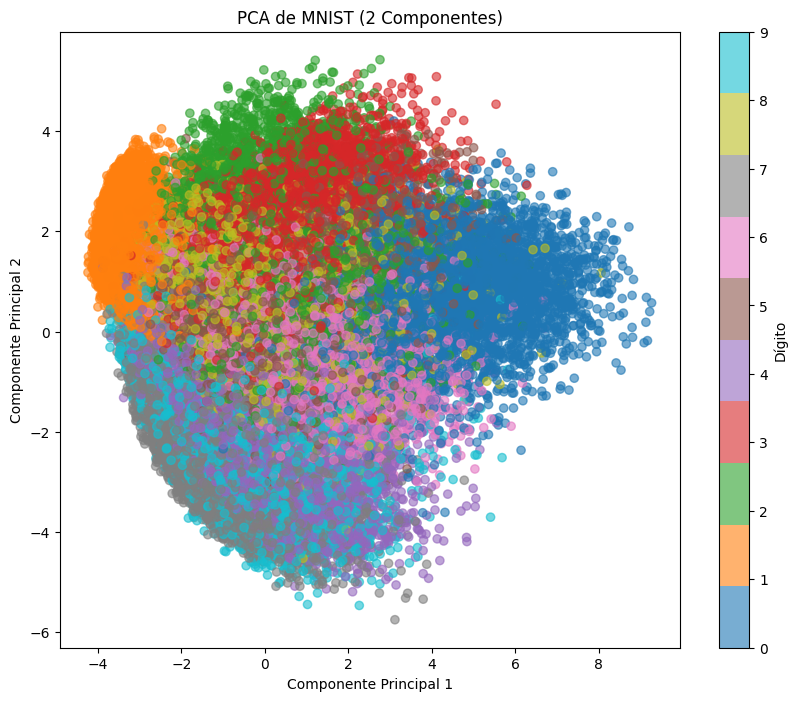

In [116]:
# Graficar los datos en 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Dígito')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de MNIST (2 Componentes)')
plt.show()


Aunque los datos estén concentrados en el centro, el gráfico de PCA aún puede proporcionar información útil:

- **Grupos separados**: Si algunos dígitos están bien separados en el gráfico, significa que PCA ha capturado características distintivas de esos dígitos.
- **Superposición**: Si los dígitos están superpuestos, significa que PCA no ha podido separarlos bien en 2 dimensiones. Esto no necesariamente indica que los datos no sean separables en dimensiones más altas.




### **Conclusiones**
La concentración de datos en el centro del gráfico de PCA es normal, especialmente cuando se reduce la dimensionalidad de un conjunto de datos complejo como MNIST. Para mejorar la visualización, considera:
- Aumentar el número de componentes principales.
- Usar técnicas no lineales como t-SNE o UMAP.
- Filtrar los datos para visualizar solo un subconjunto.
